In [ ]:
%ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/DataSets

/content/drive/MyDrive/DataSets


In [ ]:
%ls

ct_data.npz  kaggle.json  rsna-data/  rsna-hemorrhage-jpg.zip


In [ ]:
# load prepared planet dataset
from numpy import load
data = load('ct_data.npz')
X, y = data['arr_0'], data['arr_1']
print('Loaded: ', X.shape, y.shape)

Loaded:  (97041, 128, 128, 3) (97041, 5)


In [ ]:
import sys
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import TimeDistributed

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)


(67928, 128, 128, 3) (67928, 5) (29113, 128, 128, 3) (29113, 5)


In [ ]:
del X, y

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='sigmoid'))
# compile model
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x=trainX,y=trainY, steps_per_epoch=len(trainX),validation_data=(testX,testY), validation_steps=len(testX), epochs=15, verbose=1)

Epoch 1/15
67928/67928 [==============================] - 510s 7ms/step - loss: 0.5173 - accuracy: 0.4222 - val_loss: 0.3956 - val_accuracy: 0.5375
Epoch 2/15
67928/67928 [==============================] - 487s 7ms/step - loss: 0.3609 - accuracy: 0.5956 - val_loss: 0.3467 - val_accuracy: 0.6337
Epoch 3/15
67928/67928 [==============================] - 489s 7ms/step - loss: 0.3170 - accuracy: 0.6423 - val_loss: 0.3375 - val_accuracy: 0.6316
Epoch 4/15
67928/67928 [==============================] - 493s 7ms/step - loss: 0.2824 - accuracy: 0.6734 - val_loss: 0.3345 - val_accuracy: 0.6477
Epoch 5/15
67928/67928 [==============================] - 489s 7ms/step - loss: 0.2498 - accuracy: 0.7007 - val_loss: 0.3246 - val_accuracy: 0.6683
Epoch 6/15
67928/67928 [==============================] - 491s 7ms/step - loss: 0.2195 - accuracy: 0.7293 - val_loss: 0.3515 - val_accuracy: 0.6239
Epoch 7/15
67928/67928 [==============================] - 488s 7ms/step - loss: 0.1902 - accuracy: 0.7492 - val_

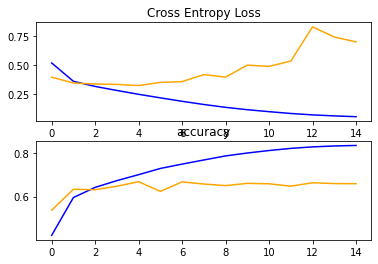

In [ ]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
del X, y

In [ ]:
loss, accuracy = model.evaluate(x = testX,y=testY ,steps=len(testX), verbose=1)

29113/29113 [==============================] - 96s 3ms/step - loss: 0.6971 - accuracy: 0.6591


In [ ]:
print('> loss=%.3f, accuracy=%.3f' % (loss, accuracy))


> loss=0.697, accuracy=0.659


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_45 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_47 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
pred = model.predict(testX)

In [ ]:
print(pred)

[[1.8783142e-08 1.0000000e+00 9.9032110e-01 7.1861129e-04 5.5238107e-08]
 [1.6245021e-14 3.8758732e-02 9.0781023e-06 9.6126491e-01 6.9749974e-02]
 [7.6169491e-16 4.6534177e-14 6.8586588e-01 9.4278163e-01 1.0000000e+00]
 ...
 [2.5991612e-06 8.2874727e-01 1.1237155e-05 1.6925511e-01 4.9374841e-02]
 [1.0708054e-07 3.9784485e-01 7.9859197e-01 9.9998796e-01 1.2228286e-05]
 [2.0775590e-11 9.1950718e-04 8.8256417e-07 3.7265379e-02 9.9978215e-01]]


In [ ]:
new_pred = np.argmax(pred, axis=1)

In [ ]:
new_test_Y = np.argmax(testY, axis=1)

In [ ]:
print(new_pred)

[1 3 4 ... 1 3 4]


In [ ]:
print(testY)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 1]
 ...
 [0 1 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [ ]:
conf = confusion_matrix(new_test_Y, new_pred)

In [ ]:
print(conf)

[[ 217  151   35  100  330]
 [  34 5769 1405 1075 1198]
 [  10  350 2771  633  442]
 [  25  578  195 3489 1655]
 [  74  474  179  660 7264]]


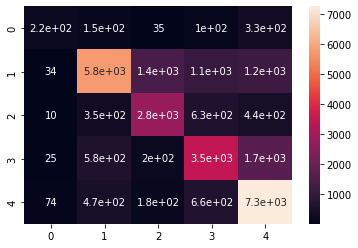

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True)